# Análisis Exploratorio de Datos para Preguntas de Negocio

Este notebook se enfoca en analizar el dataset procesado para responder preguntas específicas de negocio.

## Configuración Inicial

Primero importaremos las librerías necesarias y cargaremos el dataset procesado usando nuestra clase `DataAnalyzer`.


In [4]:
import os
import sys
import glob
import pandas as pd


# Añadir el directorio src al path para poder importar nuestros módulos
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar nuestras clases
from src.data.data_analyzer import DataAnalyzer
from src.features.feature_engineering import FeatureEngineering

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%load_ext autoreload
%autoreload 2


In [5]:
# Encontrar el archivo más reciente en la carpeta processed
processed_dir = os.path.join(project_root, 'data', 'processed')
processed_files = glob.glob(os.path.join(processed_dir, '*.csv'))

if not processed_files:
    raise FileNotFoundError("No se encontraron archivos CSV en la carpeta processed")

# Ordenar por fecha de modificación y tomar el más reciente
latest_file = max(processed_files, key=os.path.getmtime)
print(f"Usando el archivo más reciente: {os.path.basename(latest_file)}")

# Crear instancia del analizador y cargar el dataset
analyzer = DataAnalyzer(latest_file)
analyzer.read_dataset()

# Mostrar información básica del dataset
print("\nInformación del dataset:")
print(f"Dimensiones: {analyzer.data.shape}")
print("\nPrimeras 5 filas:")
analyzer.data.head()


2025-07-02 22:30:35,732 - INFO - Leyendo dataset desde c:\Users\Milara\Desktop\github\meli-challenge\data\processed\new_items_dataset_procesado_v1_20250702_185421.csv


Usando el archivo más reciente: new_items_dataset_procesado_v1_20250702_185421.csv


2025-07-02 22:30:37,912 - INFO - Dataset cargado exitosamente. Shape: (85060, 25)



Información del dataset:
Dimensiones: (85060, 25)

Primeras 5 filas:


,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,seller_id,seller_country,seller_province,seller_city,seller_loyalty,buying_mode,shipping_mode,shipping_admits_pickup,shipping_is_free,status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
0,MLA576883746,Stassen Espatulas Milenio Numero 3 Codigo 590-3,2015-08-29 12:55:03+00:00,119.000,119.000,MLA3530,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",65545512,Argentina,Capital Federal,MICROCENTRO,bronze,buy_it_now,not_specified,False,False,active,Sí,1,19.000,0.000,19.000
1,MLA581002506,Charm Britania Plata 925 Ovalado!!! Armá La Tu...,2015-09-23 12:41:07+00:00,450.000,450.000,MLA6440,['dragged_bids_and_visits'],[],[],"[{'size': '312x308', 'secure_url': 'https://a2...",101563090,Argentina,Buenos Aires,Morón,bronze,buy_it_now,me2,False,False,active,Sí,1,2.000,0.000,2.000
2,MLA574707083,El Hombre De Magallanes Virginia Carreño Novela,2015-08-16 13:34:01+00:00,40.000,40.000,MLA2044,['dragged_bids_and_visits'],[],[],"[{'size': '375x500', 'secure_url': 'https://a2...",48581930,Argentina,Buenos Aires,acassuso,bronze,buy_it_now,me2,True,False,active,Sí,0,1.000,0.000,1.000
3,MLA576209717,Molde Placa Boca Espejo Bota Labial Chupetin P...,2015-08-25 14:42:20+00:00,30.000,30.000,MLA34294,['dragged_bids_and_visits'],[],[],"[{'size': '396x500', 'secure_url': 'https://a2...",39469568,Argentina,Capital Federal,Palermo,bronze,buy_it_now,not_specified,True,False,active,NaN,1,1.000,1.000,1.000
4,MLA580441035,Set De Cubiertos Para 6 Personas Acero Inoxida...,2015-09-19 23:40:26+00:00,1700.000,1700.000,MLA30097,[],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",130649316,Argentina,Buenos Aires,MATHEU,silver,buy_it_now,me2,True,False,active,NaN,1,1.000,0.000,1.000


## 1.  Preguntas por responder

### 1.1 ¿Cuántos registros hay por publicación?

In [3]:
# Contar frecuencia de cada ID
id_counts = analyzer.data['id'].value_counts()

# Estadísticas básicas
total_records = len(analyzer.data)
unique_ids = len(id_counts)
ids_with_duplicates = sum(id_counts > 1)
max_duplicates = id_counts.max()

print(f"Estadísticas de IDs:")
print(f"Total de registros: {total_records:,}")
print(f"IDs únicos: {unique_ids:,}")
print(f"IDs con duplicados: {ids_with_duplicates:,}")
print(f"Máximo de registros para un mismo ID: {max_duplicates:,}")


Estadísticas de IDs:
Total de registros: 85,060
IDs únicos: 85,060
IDs con duplicados: 0
Máximo de registros para un mismo ID: 1


### 1.2 ¿Cuántos publicaciones de productos hay por seller_id?

In [4]:
# Contar frecuencia de cada ID
id_counts = analyzer.data['seller_id'].value_counts()

# Estadísticas básicas
total_records = len(analyzer.data)
unique_ids = len(id_counts)
ids_with_duplicates = sum(id_counts > 1)
max_duplicates = id_counts.max()

print(f"Estadísticas de IDs:")
print(f"Total de registros: {total_records:,}")
print(f"IDs únicos: {unique_ids:,}")
print(f"IDs con duplicados: {ids_with_duplicates:,}")
print(f"Máximo de registros para un mismo ID: {max_duplicates:,}")


Estadísticas de IDs:
Total de registros: 85,060
IDs únicos: 28,435
IDs con duplicados: 9,388
Máximo de registros para un mismo ID: 928


2025-07-02 19:28:30,887 - INFO - Análisis de distribución de vendedores completado:
- Total de vendedores únicos: 28,435
- Vendedor con más productos: 52340590 (928 productos)
- Promedio de productos por vendedor: 3.0


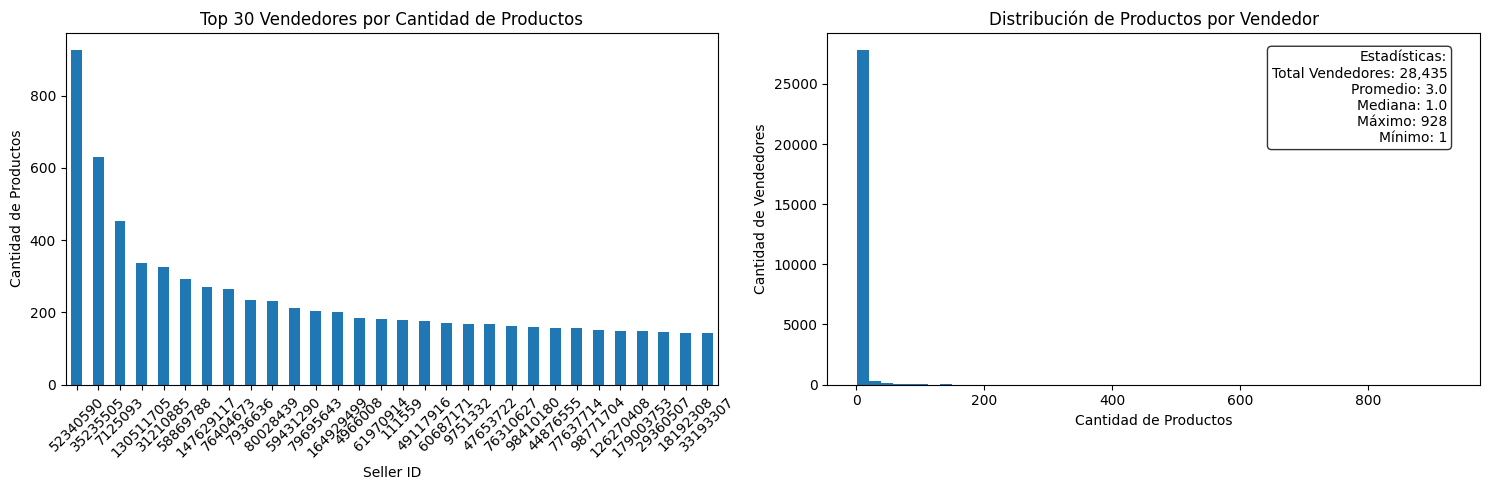

In [7]:
# O personalizando parámetros
analyzer.plot_seller_distribution(figsize=(15, 5), top_n=30)

### 1.3 ¿Qué producto ha generado más volumen de venta?

2025-07-02 19:39:59,806 - INFO - Análisis de volumen de ventas completado:
- ID con mayor volumen: MLA577992669
- Volumen máximo: $2,022,890.10
- Cantidad vendida: 2,299.0
- Precio promedio: $879.90


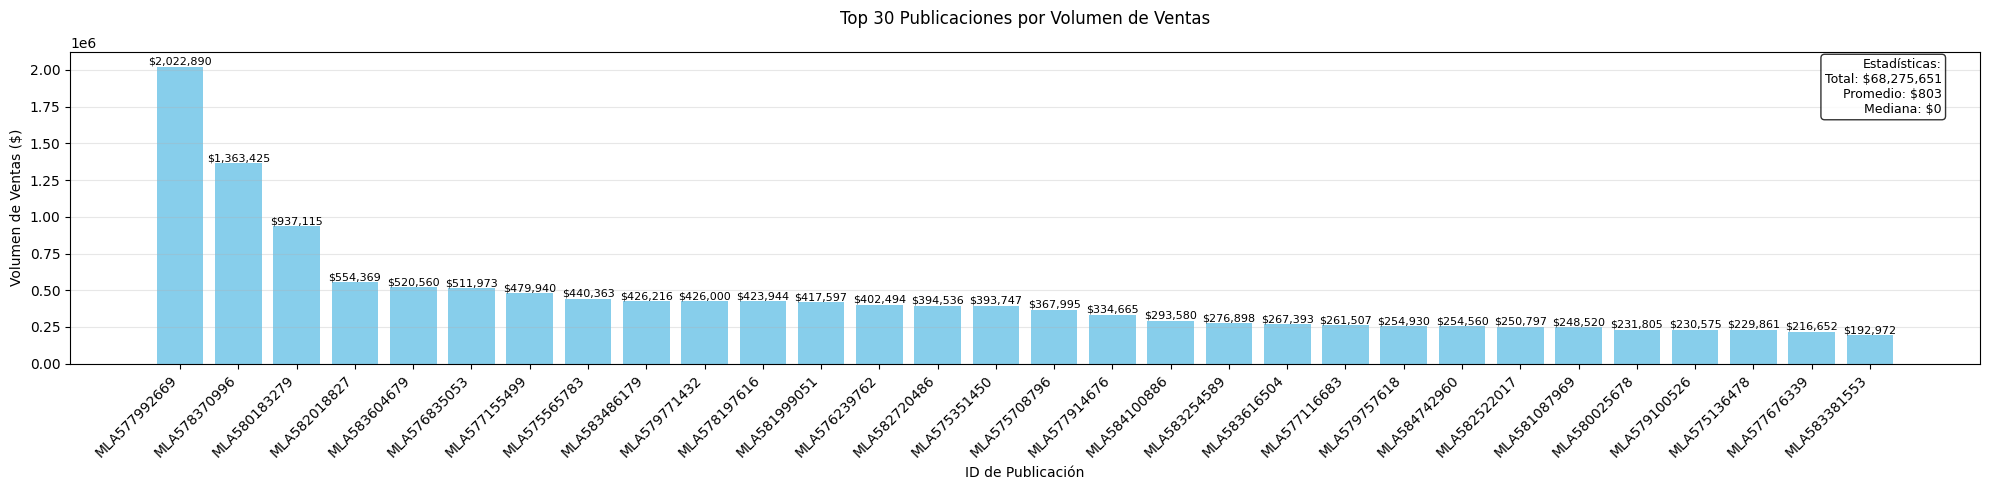

In [11]:
# O personalizando parámetros
analyzer.analyze_sales_volume(top_n=30, figsize=(20, 5))

2025-07-02 20:01:15,458 - INFO - Análisis de distribución de volumen de ventas completado:
- Mediana: $0.00
- Media: $802.68
- Cantidad de outliers: 14715


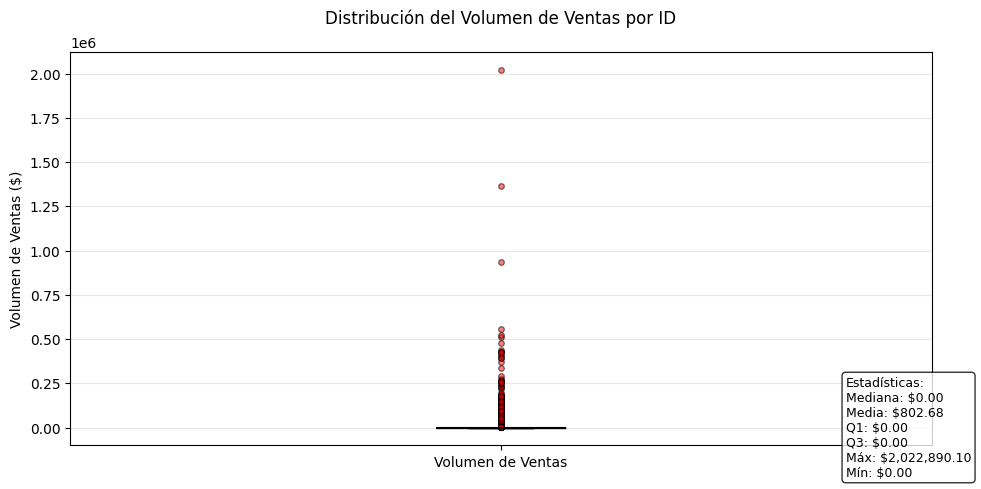

In [ ]:
# ¿Cómo se ve la distribución de los volúmenes de ventas?
analyzer.plot_sales_volume_distribution(figsize=(10, 5))

2025-07-02 20:19:08,379 - INFO - Análisis de histograma de volumen de ventas completado:
- Media: $802.68
- Mediana: $0.00
- Asimetría: 86.46
- % de datos sobre P95: 5.0%


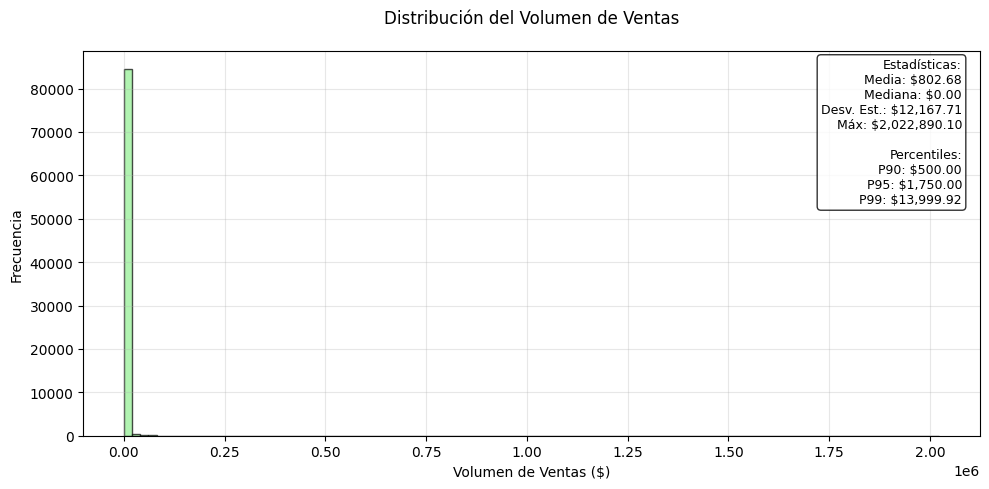

In [22]:
# ¿Cómo se ve la distribución de los volúmenes de ventas con transformación logarítmica?
analyzer.plot_sales_volume_histogram(figsize=(10, 5), bins=100)

2025-07-02 20:18:59,948 - INFO - Análisis CDF de volumen de ventas completado:
- Mediana (P50): $0.00
- 90% de los IDs tienen ventas menores a: $500.00
- 99% de los IDs tienen ventas menores a: $13,999.92


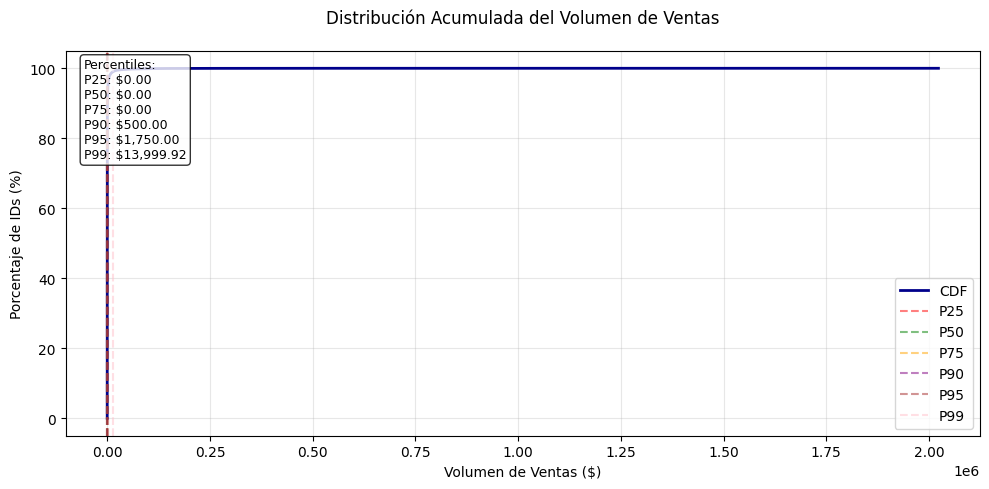

In [21]:
# ¿Qué porcentaje de ventas se realizan por debajo de 1000?
analyzer.plot_sales_volume_cdf(figsize=(10,5))

2025-07-02 20:21:39,332 - INFO - Análisis CDF de sold_quantity completado:
- Mediana (P50): 0
- 90% de los IDs tienen valores menores a: 2
- Media: 2.48
- Porcentaje de IDs con valor 0: 82.7%


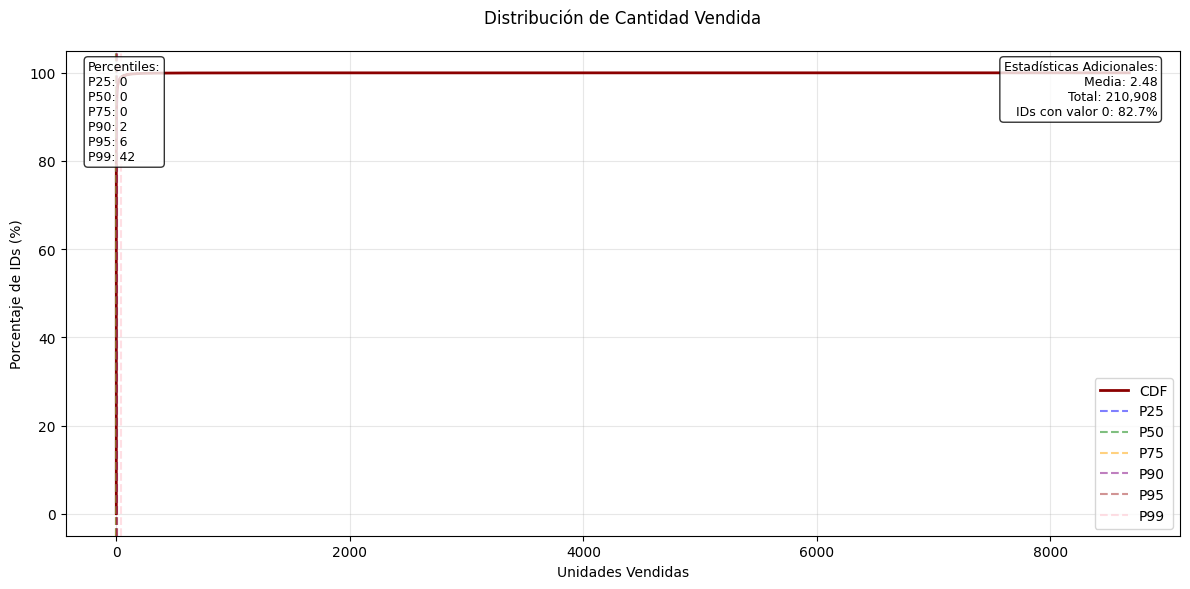

In [23]:
# Para cantidad vendida
analyzer.plot_column_cdf('sold_quantity', 
                        title='Distribución de Cantidad Vendida',
                        x_label='Unidades Vendidas')

El 80% de las publicaciones no han vendido :(

2025-07-02 20:39:19,233 - INFO - Análisis CDF de sold_quantity (rango: 0 - 5) completado:
- Total IDs: 85,060
- IDs en rango: 80,781 (95.0%)
- IDs bajo umbral inferior: 0 (0.0%)
- IDs sobre umbral superior: 4,279 (5.0%)
- Media en rango: 0.25
- Total acumulado en rango: 19,837


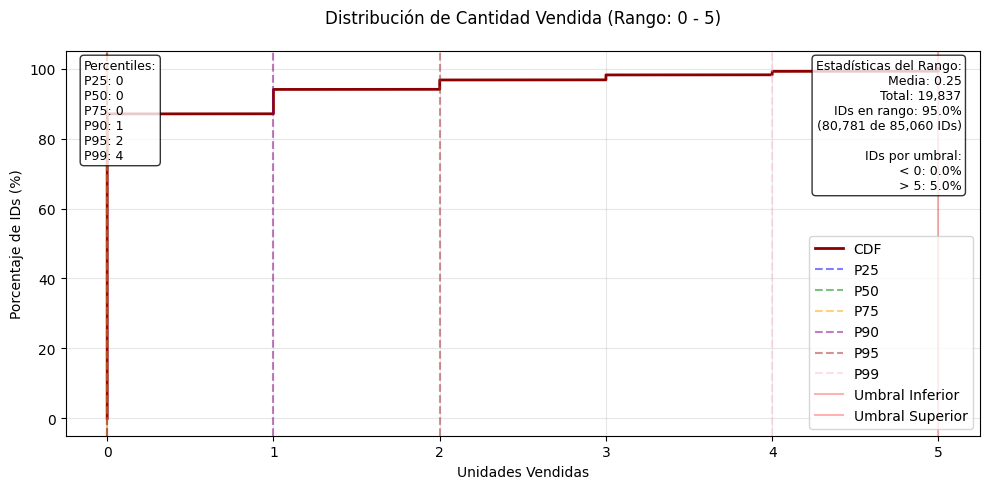

In [29]:
# Para cantidad vendida entre 50 y 1000 unidades
analyzer.plot_column_cdf_with_range(
    'sold_quantity',
    lower_threshold=0,
    upper_threshold=5,
    figsize=(10, 5),
    title='Distribución de Cantidad Vendida',
    x_label='Unidades Vendidas'
)

2025-07-02 22:04:53,411 - INFO - Análisis CDF de sold_quantity (rango: 2 - 2,000) completado:
- Total IDs: 85,060
- IDs en rango: 9,053 (10.6%)
- IDs bajo umbral inferior: 76,000 (89.3%)
- IDs sobre umbral superior: 7 (0.0%)
- Media en rango: 19.81
- Total acumulado en rango: 179,312


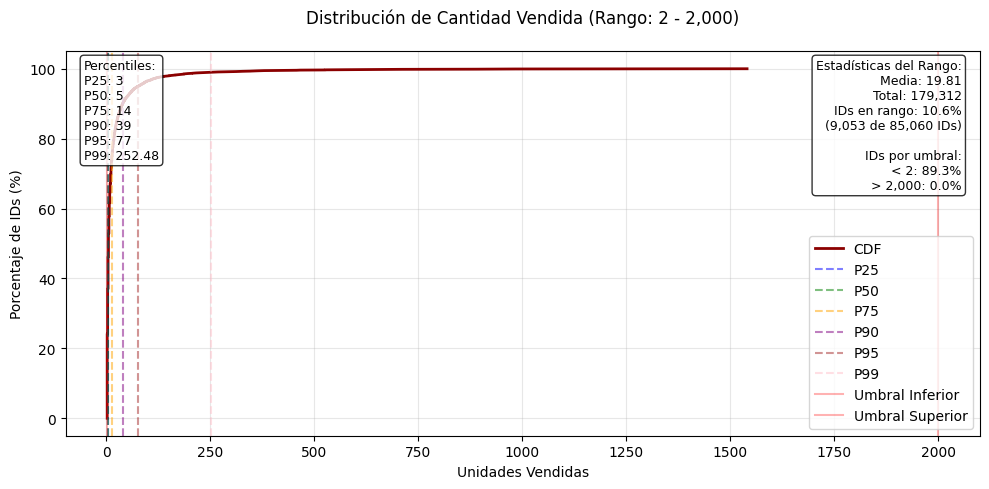

In [38]:
# Para cantidad vendida entre 50 y 1000 unidades
analyzer.plot_column_cdf_with_range(
    'sold_quantity',
    lower_threshold=2,
    upper_threshold=2000,
    figsize=(10, 5),
    title='Distribución de Cantidad Vendida',
    x_label='Unidades Vendidas'
)

2025-07-02 19:50:26,269 - INFO - Análisis de precio vs cantidad completado:
- Rango de precios: $60.00 - $1,779.00
- Rango de cantidades: 101.0 - 8,676.0
- ID más vendido: MLA577992669 (Volumen: $2,022,890.10)


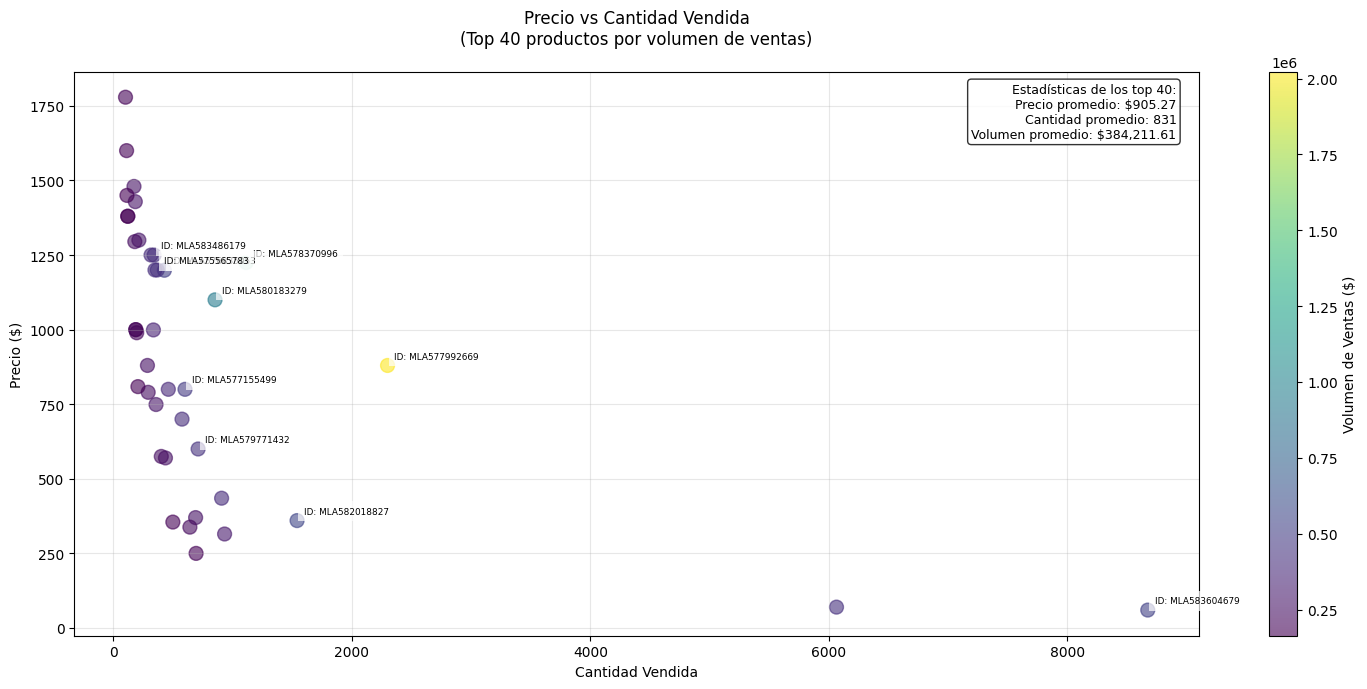

In [ ]:
# El volumen del top es por precio o por cantidad?
analyzer.plot_price_vs_quantity(top_n=40, figsize=(15, 7))

No necesariamente tiene que ser un producto caro, sino uno de precio promedio que se venda bastante. ¿Qué características tiene ese producto que lo hacen vender tan bien? ...Pero después, de haber visto la cantidad de ventas de las demás publicaciones, la proporción es muy baja. Y ahora las preguntas son:
- ¿Cómo incrementar las ventas de los productos que no han vendido nada?
- ¿Se pueden encontrar productos potenciales?
- ¿Qué características tienen los productos que hasta ahora se han vendido?

Para esto, crearé una variable nueva binaría que haga referencia si el producto se ha vendido o no. 

In [6]:
# Asegurarnos de que tenemos un DataFrame y crear instancia de FeatureEngineering
data_df = pd.DataFrame(analyzer.data)
fe = FeatureEngineering(data_df)

# Crear la característica binaria de ventas
fe.create_binary_sold_feature()

print("Feature Engineering inicializado correctamente.")

2025-07-02 22:30:48,178 - INFO - Columna 'sold' creada exitosamente:
- Total de productos: 85,060
- Productos vendidos: 14,715 (17.3%)
- Productos sin ventas: 70,345 (82.7%)


Feature Engineering inicializado correctamente.


2025-07-02 23:49:43,596 - INFO - 
Análisis de distribución de available_quantity por grupo completado:
Estadísticas descriptivas:
- Grupo vendidos (n=14,715):
  Media: 79.82
  Mediana: 3.00
  Desv. Est.: 700.19
- Grupo no vendidos (n=70,345):
  Media: 24.07
  Mediana: 1.00
  Desv. Est.: 313.92

Resultados de las pruebas estadísticas:
Test de Normalidad (Shapiro-Wilk):
- Grupo vendidos: No normal (p=0.0000)
- Grupo no vendidos: No normal (p=0.0000)
T-test (prueba paramétrica):
- Hay diferencia significativa (p=0.0000)
Mann-Whitney U test (prueba no paramétrica):
- Hay diferencia significativa (p=0.0000)
Tamaño del efecto (Cohen's d):
- d=0.137 (efecto insignificante)


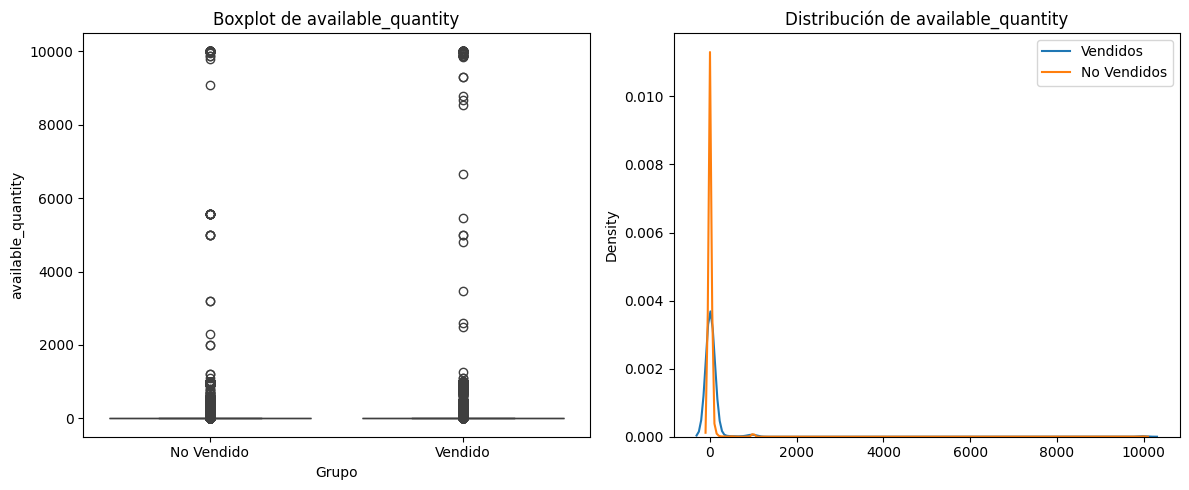

In [49]:
# Analizar la distribución del precio entre productos vendidos y no vendidos, removiendo outliers
fe.analyze_distribution_by_sold(
    numeric_column='available_quantity',
    sold_column='sold',  # si usas otra columna para separar grupos
    figsize=(12, 5),    # tamaño personalizado de la figura
    remove_outliers=False # si quieres remover outliers
)

2025-07-02 23:51:41,555 - WARNING - IQR es 0, los datos son muy similares. No se eliminarán outliers.
2025-07-02 23:51:41,555 - INFO - 
Outliers removidos usando método IQR:
- Grupo vendidos: 1,854 registros (12.6%)
- Grupo no vendidos: 0 registros (0.0%)
2025-07-02 23:51:42,899 - INFO - 
Análisis de distribución de available_quantity por grupo completado:
Estadísticas descriptivas (sin outliers):
- Grupo vendidos (n=12,861):
  Media: 3.97
  Mediana: 2.00
  Desv. Est.: 4.33
- Grupo no vendidos (n=70,345):
  Media: 24.07
  Mediana: 1.00
  Desv. Est.: 313.92

Resultados de las pruebas estadísticas:
Test de Normalidad (Shapiro-Wilk):
- Grupo vendidos: No normal (p=0.0000)
- Grupo no vendidos: No normal (p=0.0000)
T-test (prueba paramétrica):
- Hay diferencia significativa (p=0.0000)
Mann-Whitney U test (prueba no paramétrica):
- Hay diferencia significativa (p=0.0000)
Tamaño del efecto (Cohen's d):
- d=-0.070 (efecto insignificante)


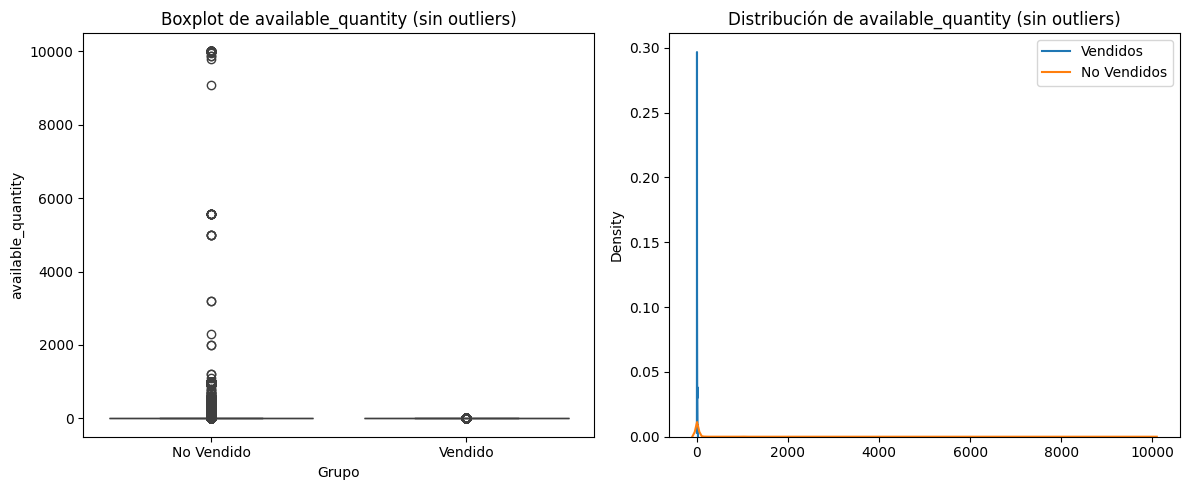

In [51]:
# Analizar la distribución del precio entre productos vendidos y no vendidos, removiendo outliers
fe.analyze_distribution_by_sold(
    numeric_column='available_quantity',
    sold_column='sold',  # si usas otra columna para separar grupos
    figsize=(12, 5),    # tamaño personalizado de la figura
    remove_outliers=True # si quieres remover outliers
)

2025-07-02 23:52:46,008 - INFO - 
Análisis de distribución de initial_quantity por grupo completado:
Estadísticas descriptivas:
- Grupo vendidos (n=14,715):
  Media: 81.24
  Mediana: 3.00
  Desv. Est.: 700.76
- Grupo no vendidos (n=70,345):
  Media: 24.07
  Mediana: 1.00
  Desv. Est.: 313.92

Resultados de las pruebas estadísticas:
Test de Normalidad (Shapiro-Wilk):
- Grupo vendidos: No normal (p=0.0000)
- Grupo no vendidos: No normal (p=0.0000)
T-test (prueba paramétrica):
- Hay diferencia significativa (p=0.0000)
Mann-Whitney U test (prueba no paramétrica):
- Hay diferencia significativa (p=0.0000)
Tamaño del efecto (Cohen's d):
- d=0.140 (efecto insignificante)


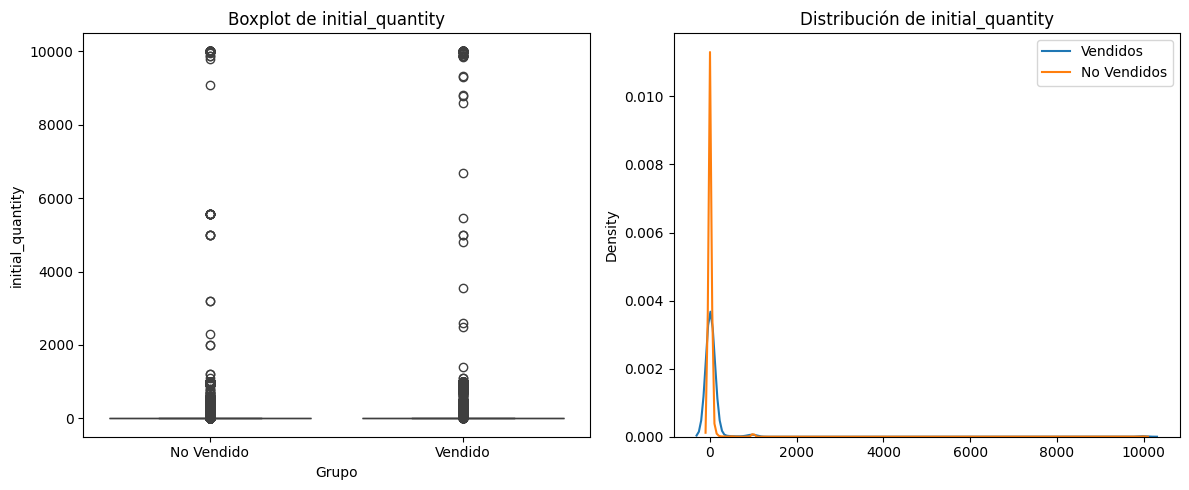

In [52]:
# Analizar la distribución del precio entre productos vendidos y no vendidos, removiendo outliers
fe.analyze_distribution_by_sold(
    numeric_column='initial_quantity',
    sold_column='sold',  # si usas otra columna para separar grupos
    figsize=(12, 5),    # tamaño personalizado de la figura
    remove_outliers=False # si quieres remover outliers
)

La mayoría de los valores para no vendido están cerca de 1. Por eso el IQR es cero y los valores no se eliminan.

2025-07-02 23:52:54,590 - WARNING - IQR es 0, los datos son muy similares. No se eliminarán outliers.
2025-07-02 23:52:54,590 - INFO - 
Outliers removidos usando método IQR:
- Grupo vendidos: 1,953 registros (13.3%)
- Grupo no vendidos: 0 registros (0.0%)
2025-07-02 23:52:55,690 - INFO - 
Análisis de distribución de initial_quantity por grupo completado:
Estadísticas descriptivas (sin outliers):
- Grupo vendidos (n=12,762):
  Media: 4.51
  Mediana: 2.00
  Desv. Est.: 4.82
- Grupo no vendidos (n=70,345):
  Media: 24.07
  Mediana: 1.00
  Desv. Est.: 313.92

Resultados de las pruebas estadísticas:
Test de Normalidad (Shapiro-Wilk):
- Grupo vendidos: No normal (p=0.0000)
- Grupo no vendidos: No normal (p=0.0000)
T-test (prueba paramétrica):
- Hay diferencia significativa (p=0.0000)
Mann-Whitney U test (prueba no paramétrica):
- Hay diferencia significativa (p=0.0000)
Tamaño del efecto (Cohen's d):
- d=-0.068 (efecto insignificante)


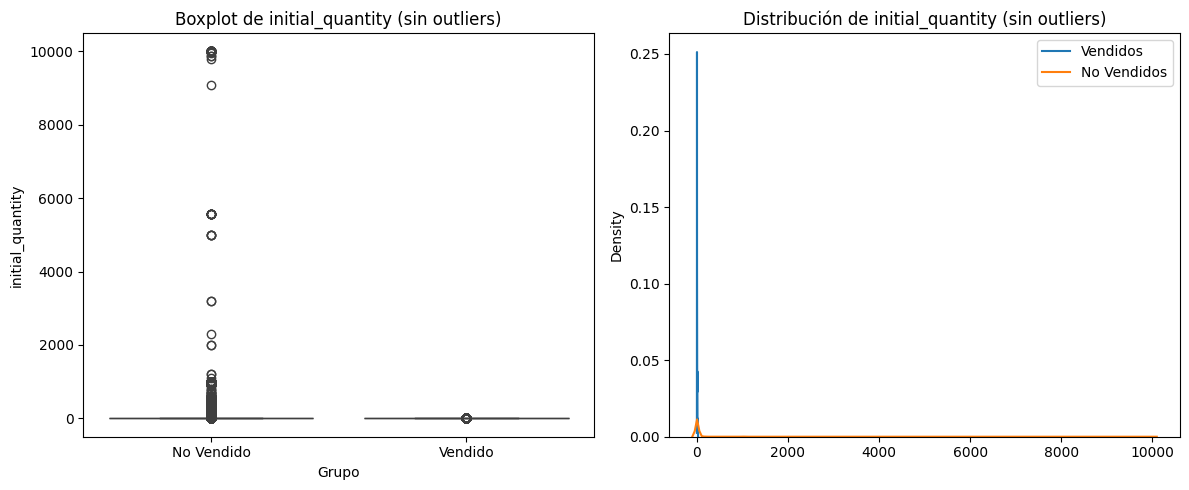

In [53]:
# Analizar la distribución del precio entre productos vendidos y no vendidos, removiendo outliers
fe.analyze_distribution_by_sold(
    numeric_column='initial_quantity',
    sold_column='sold',  # si usas otra columna para separar grupos
    figsize=(12, 5),    # tamaño personalizado de la figura
    remove_outliers=True # si quieres remover outliers
)

2025-07-02 23:53:18,092 - INFO - 
Análisis de distribución de price por grupo completado:
Estadísticas descriptivas:
- Grupo vendidos (n=14,715):
  Media: 406.93
  Mediana: 250.00
  Desv. Est.: 414.39
- Grupo no vendidos (n=70,345):
  Media: 329.09
  Mediana: 170.00
  Desv. Est.: 383.36

Resultados de las pruebas estadísticas:
Test de Normalidad (Shapiro-Wilk):
- Grupo vendidos: No normal (p=0.0000)
- Grupo no vendidos: No normal (p=0.0000)
T-test (prueba paramétrica):
- Hay diferencia significativa (p=0.0000)
Mann-Whitney U test (prueba no paramétrica):
- Hay diferencia significativa (p=0.0000)
Tamaño del efecto (Cohen's d):
- d=0.200 (efecto pequeño)


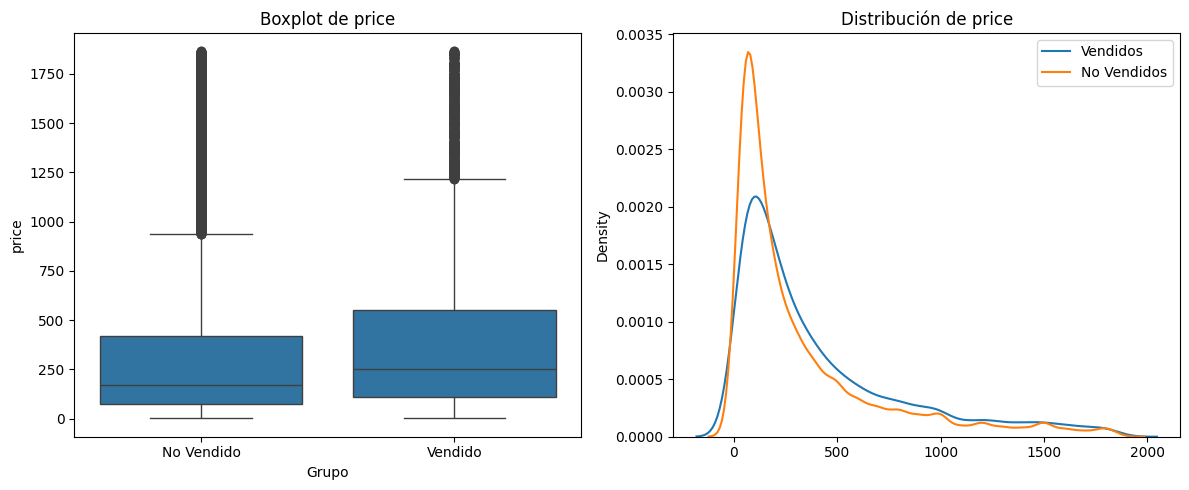

In [54]:
# Analizar la distribución del precio entre productos vendidos y no vendidos, removiendo outliers
fe.analyze_distribution_by_sold(
    numeric_column='price',
    sold_column='sold',  # si usas otra columna para separar grupos
    figsize=(12, 5),    # tamaño personalizado de la figura
    remove_outliers=False # si quieres remover outliers
)

2025-07-02 23:53:52,715 - WARNING - IQR es 0, los datos son muy similares. No se eliminarán outliers.
2025-07-02 23:53:52,715 - INFO - 
Outliers removidos usando método IQR:
- Grupo vendidos: 1,953 registros (13.3%)
- Grupo no vendidos: 0 registros (0.0%)
2025-07-02 23:53:54,420 - INFO - 
Análisis de distribución de initial_quantity por grupo completado:
Estadísticas descriptivas (sin outliers):
- Grupo vendidos (n=12,762):
  Media: 4.51
  Mediana: 2.00
  Desv. Est.: 4.82
- Grupo no vendidos (n=70,345):
  Media: 24.07
  Mediana: 1.00
  Desv. Est.: 313.92

Resultados de las pruebas estadísticas:
Test de Normalidad (Shapiro-Wilk):
- Grupo vendidos: No normal (p=0.0000)
- Grupo no vendidos: No normal (p=0.0000)
T-test (prueba paramétrica):
- Hay diferencia significativa (p=0.0000)
Mann-Whitney U test (prueba no paramétrica):
- Hay diferencia significativa (p=0.0000)
Tamaño del efecto (Cohen's d):
- d=-0.068 (efecto insignificante)


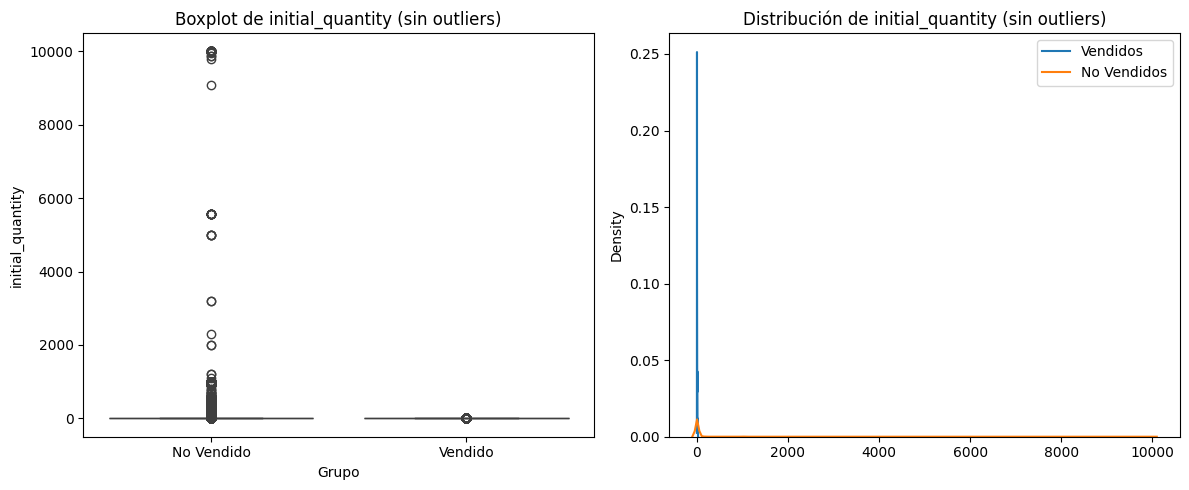

In [55]:
# Analizar la distribución del precio entre productos vendidos y no vendidos, removiendo outliers
fe.analyze_distribution_by_sold(
    numeric_column='initial_quantity',
    sold_column='sold',  # si usas otra columna para separar grupos
    figsize=(12, 5),    # tamaño personalizado de la figura
    remove_outliers=True # si quieres remover outliers
)

No se ve gran efecto en la distribución de los precios. Sin y con Outliers.

Se van a crear más variables para podamos explorar más detalle

In [56]:
# Se agrega la variable días desde la creación del producto
fe.add_post_days()

2025-07-03 06:04:27,583 - INFO - Columna 'post_days' creada exitosamente.
Rango de días: 0 a 60 días
Promedio de días: 27.7


In [57]:
# Se agrega la variable weekday que es el día de la semana en el que se publicó el producto
fe.add_weekday()

2025-07-03 06:06:45,412 - INFO - Columna 'weekday' creada exitosamente.
Distribución por día de la semana:
- Lunes: 15,157 (17.8%)
- Martes: 15,840 (18.6%)
- Miércoles: 13,319 (15.7%)
- Jueves: 10,597 (12.5%)
- Viernes: 12,463 (14.7%)
- Sábado: 9,186 (10.8%)
- Domingo: 8,498 (10.0%)


In [58]:
# Se agrega la variables is_discount que es un 1 si el producto tiene un descuento aplicado
fe.add_is_discount()

2025-07-03 06:12:00,423 - INFO - Columna 'is_discount' creada exitosamente.
No se encontraron items con descuento en el dataset


In [60]:
# Se crea la variable len_title que es la longitud del título del producto
fe.add_title_length()

2025-07-03 06:16:09,193 - INFO - Columna 'len_title' creada exitosamente.
Estadísticas de longitud de títulos:
- Mínimo: 1 caracteres
- Promedio: 45.3 caracteres
- Mediana: 48 caracteres
- Máximo: 63 caracteres
Distribución por longitud de título:
- 1-25 caracteres: 6,983 (8.2%)
- 26-50 caracteres: 38,045 (44.7%)
- 51-75 caracteres: 40,032 (47.1%)
- 76-100 caracteres: 0 (0.0%)
- >100 caracteres: 0 (0.0%)


In [64]:
# Se agrega la variable num_tags que es el número de tags del producto
fe.add_num_tags()   

2025-07-03 06:20:59,858 - INFO - Columna 'num_tags' creada exitosamente.
Estadísticas de número de tags:
- Mínimo: 0
- Promedio: 0.8
- Mediana: 1
- Máximo: 2
Distribución de número de tags:
- 0 tags: 18,995 (22.3%)
- 1 tags: 65,088 (76.5%)
- 2 tags: 977 (1.1%)


In [66]:
# Se agrega la variable num_variations que es el número de variaciones del producto
fe.add_num_variations()

2025-07-03 06:24:51,168 - INFO - Columna 'num_variations' creada exitosamente.
Items con variaciones: 7,837 de 85,060 (9.2%)

Estadísticas de número de variaciones:
- Mínimo: 0
- Promedio: 0.2
- Mediana: 0
- Máximo: 50
Distribución de número de variaciones:
- 0 variaciones: 77,223 (90.8%)
- 1 variaciones: 5,682 (6.7%)
- 2 variaciones: 374 (0.4%)
- 3 variaciones: 248 (0.3%)
- 4 variaciones: 412 (0.5%)
- 5 variaciones: 266 (0.3%)
- 6 variaciones: 239 (0.3%)
- 7 variaciones: 257 (0.3%)
- 8 variaciones: 65 (0.1%)
- 9 variaciones: 30 (0.0%)
- 10 variaciones: 97 (0.1%)
- 11 variaciones: 20 (0.0%)
- 12 variaciones: 42 (0.0%)
- 13 variaciones: 7 (0.0%)
- 14 variaciones: 13 (0.0%)
- 15 variaciones: 12 (0.0%)
- 16 variaciones: 11 (0.0%)
- 17 variaciones: 3 (0.0%)
- 18 variaciones: 13 (0.0%)
- 19 variaciones: 2 (0.0%)
- 20 variaciones: 8 (0.0%)
- 21 variaciones: 4 (0.0%)
- 22 variaciones: 5 (0.0%)
- 23 variaciones: 1 (0.0%)
- 24 variaciones: 10 (0.0%)
- 25 variaciones: 2 (0.0%)
- 30 variaciones: 

In [68]:
# Se agrega la variable num_pictures que es el número de imágenes del producto
fe.add_num_pictures()

2025-07-03 06:34:23,060 - INFO - Columna 'num_pictures' creada exitosamente.
Items con imágenes: 84,421 de 85,060 (99.2%)

Estadísticas de número de imágenes:
- Mínimo: 0
- Promedio: 2.7
- Mediana: 2
- Máximo: 36
Distribución de número de imágenes:
- 0 imágenes: 639 (0.8%)
- 1 imágenes: 30,673 (36.1%)
- 2 imágenes: 15,931 (18.7%)
- 3 imágenes: 12,576 (14.8%)
- 4 imágenes: 8,525 (10.0%)
- 5 imágenes: 5,802 (6.8%)
- 6 imágenes: 10,544 (12.4%)
- 7 imágenes: 88 (0.1%)
- 8 imágenes: 52 (0.1%)
- 9 imágenes: 42 (0.0%)
- 10 imágenes: 58 (0.1%)
- 11 imágenes: 26 (0.0%)
- 12 imágenes: 31 (0.0%)
- 13 imágenes: 5 (0.0%)
- 14 imágenes: 22 (0.0%)
- 15 imágenes: 6 (0.0%)
- 16 imágenes: 3 (0.0%)
- 18 imágenes: 14 (0.0%)
- 19 imágenes: 2 (0.0%)
- 20 imágenes: 4 (0.0%)
- 21 imágenes: 2 (0.0%)
- 22 imágenes: 2 (0.0%)
- 23 imágenes: 1 (0.0%)
- 24 imágenes: 3 (0.0%)
- 25 imágenes: 1 (0.0%)
- 27 imágenes: 2 (0.0%)
- 28 imágenes: 1 (0.0%)
- 29 imágenes: 1 (0.0%)
- 30 imágenes: 1 (0.0%)
- 33 imágenes: 1 (0.0%

In [69]:
fe.add_categorical_encoding('shipping_admits_pickup') 

2025-07-03 06:40:54,667 - INFO - Columna 'shipping_admits_pickup_cat' creada exitosamente.
Valores únicos encontrados: 2
Mapeo de valores:
- False → 1: 16,086 ocurrencias (18.9%)
- True → 2: 68,974 ocurrencias (81.1%)


In [70]:
# Se agrega la variable shipping_is_free_cat que es un 1 si el producto tiene envío gratis
fe.add_categorical_encoding('shipping_is_free') 

2025-07-03 06:41:14,810 - INFO - Columna 'shipping_is_free_cat' creada exitosamente.
Valores únicos encontrados: 2
Mapeo de valores:
- False → 1: 83,007 ocurrencias (97.6%)
- True → 2: 2,053 ocurrencias (2.4%)


In [71]:
# Se agrega la variable buying_mode_cat que es el modo de compra del producto
fe.add_categorical_encoding('buying_mode') 

2025-07-03 06:41:35,487 - INFO - Columna 'buying_mode_cat' creada exitosamente.
Valores únicos encontrados: 3
Mapeo de valores:
- auction → 1: 743 ocurrencias (0.9%)
- buy_it_now → 2: 84,250 ocurrencias (99.0%)
- classified → 3: 67 ocurrencias (0.1%)


In [72]:
# Se agrega la variable status_cat que es el estado del producto
fe.add_categorical_encoding('status') 

2025-07-03 06:42:55,910 - INFO - Columna 'status_cat' creada exitosamente.
Valores únicos encontrados: 4
Mapeo de valores:
- active → 1: 81,670 ocurrencias (96.0%)
- closed → 2: 18 ocurrencias (0.0%)
- not_yet_active → 3: 1 ocurrencias (0.0%)
- paused → 4: 3,371 ocurrencias (4.0%)


In [73]:
# Se agrega la variable shipping_mode_cat que es el modo de envío del producto
fe.add_categorical_encoding('shipping_mode') 

2025-07-03 06:44:10,294 - INFO - Columna 'shipping_mode_cat' creada exitosamente.
Valores únicos encontrados: 4
Mapeo de valores:
- custom → 1: 2,842 ocurrencias (3.3%)
- me1 → 2: 84 ocurrencias (0.1%)
- me2 → 3: 47,183 ocurrencias (55.5%)
- not_specified → 4: 34,951 ocurrencias (41.1%)


In [74]:
# Se agrega la variable seller_loyalty_cat
fe.add_categorical_encoding('seller_loyalty') 

2025-07-03 06:44:17,149 - INFO - Columna 'seller_loyalty_cat' creada exitosamente.
Valores únicos encontrados: 7
Mapeo de valores:
- bronze → 1: 56,534 ocurrencias (66.5%)
- free → 2: 17,463 ocurrencias (20.5%)
- gold → 3: 1,736 ocurrencias (2.0%)
- gold_premium → 4: 300 ocurrencias (0.4%)
- gold_pro → 5: 9 ocurrencias (0.0%)
- gold_special → 6: 2,322 ocurrencias (2.7%)
- silver → 7: 6,696 ocurrencias (7.9%)


In [86]:
# Se agrega la variable category_id pero como categorica
fe.add_categorical_encoding('category_id') 

2025-07-03 07:23:51,723 - INFO - Columna 'category_id_cat' creada exitosamente.
Valores únicos encontrados: 9043
Mapeo de valores:
- MLA10059 → 1: 12 ocurrencias (0.0%)
- MLA10060 → 2: 15 ocurrencias (0.0%)
- MLA10061 → 3: 4 ocurrencias (0.0%)
- MLA100656 → 4: 4 ocurrencias (0.0%)
- MLA100657 → 5: 1 ocurrencias (0.0%)
- MLA100658 → 6: 3 ocurrencias (0.0%)
- MLA100659 → 7: 2 ocurrencias (0.0%)
- MLA10066 → 8: 7 ocurrencias (0.0%)
- MLA100660 → 9: 1 ocurrencias (0.0%)
- MLA100661 → 10: 2 ocurrencias (0.0%)
- MLA100664 → 11: 5 ocurrencias (0.0%)
- MLA100666 → 12: 1 ocurrencias (0.0%)
- MLA100668 → 13: 1 ocurrencias (0.0%)
- MLA10067 → 14: 17 ocurrencias (0.0%)
- MLA10071 → 15: 13 ocurrencias (0.0%)
- MLA10072 → 16: 8 ocurrencias (0.0%)
- MLA10075 → 17: 3 ocurrencias (0.0%)
- MLA10076 → 18: 55 ocurrencias (0.1%)
- MLA100775 → 19: 2 ocurrencias (0.0%)
- MLA100776 → 20: 9 ocurrencias (0.0%)
- MLA100780 → 21: 2 ocurrencias (0.0%)
- MLA100781 → 22: 1 ocurrencias (0.0%)
- MLA10079 → 23: 2 ocurr

In [77]:
# Se agrega la variable dragged_bids_and_visits que es un 1 si el producto tiene un dragged_bids_and_visits
fe.add_tag_indicator('dragged_bids_and_visits')  # creará 'tags_best_seller'

2025-07-03 07:00:30,399 - INFO - Columna 'tags_dragged_bids_and_visits' creada exitosamente.
Items con el tag 'dragged_bids_and_visits': 65,791 de 85,060 (77.3%)


In [78]:
# Se agrega la variable dragged_bids_and_visits que es un 1 si el producto tiene un dragged_bids_and_visits
fe.add_tag_indicator('good_quality_thumbnail')  # creará '

2025-07-03 07:00:39,138 - INFO - Columna 'tags_good_quality_thumbnail' creada exitosamente.
Items con el tag 'good_quality_thumbnail': 1,209 de 85,060 (1.4%)


In [79]:
# Se agrega la variable dragged_bids_and_visits que es un 1 si el producto tiene un dragged_bids_and_visits
fe.add_tag_indicator('poor_quality_thumbnail')  # creará '

2025-07-03 07:00:44,934 - INFO - Columna 'tags_poor_quality_thumbnail' creada exitosamente.
Items con el tag 'poor_quality_thumbnail': 9 de 85,060 (0.0%)


### Se quitan las variables que fueron origen pero que ahora no se necesitan para el siguiente paso

In [81]:
fe.remove_columns(['id', 'title', 'date_created','tags','attributes','variations','pictures','seller_country','seller_province','seller_city','seller_loyalty','buying_mode','shipping_mode','shipping_admits_pickup','shipping_is_free','status','warranty'])

2025-07-03 07:14:26,191 - INFO - Se eliminaron 17 columnas exitosamente.
Columnas eliminadas:
- id
- title
- date_created
- tags
- attributes
- variations
- pictures
- seller_country
- seller_province
- seller_city
- seller_loyalty
- buying_mode
- shipping_mode
- shipping_admits_pickup
- shipping_is_free
- status
- warranty
Columnas restantes en el DataFrame: 25


Se eliminan las ubicaciones para reducir el alcance del proyecto. Y también porque el producto debe venderse bien sin importar el lugar de ubicación del vendedor.

## Correlación entre las variables

2025-07-03 07:29:16,945 - INFO - Matriz de correlación generada exitosamente.
Variables numéricas analizadas: 24
Correlaciones más fuertes encontradas (|r| >= 0.5):
- available_quantity vs initial_quantity: 1.000
- price vs base_price: 1.000
- tags_dragged_bids_and_visits vs num_tags: 0.961


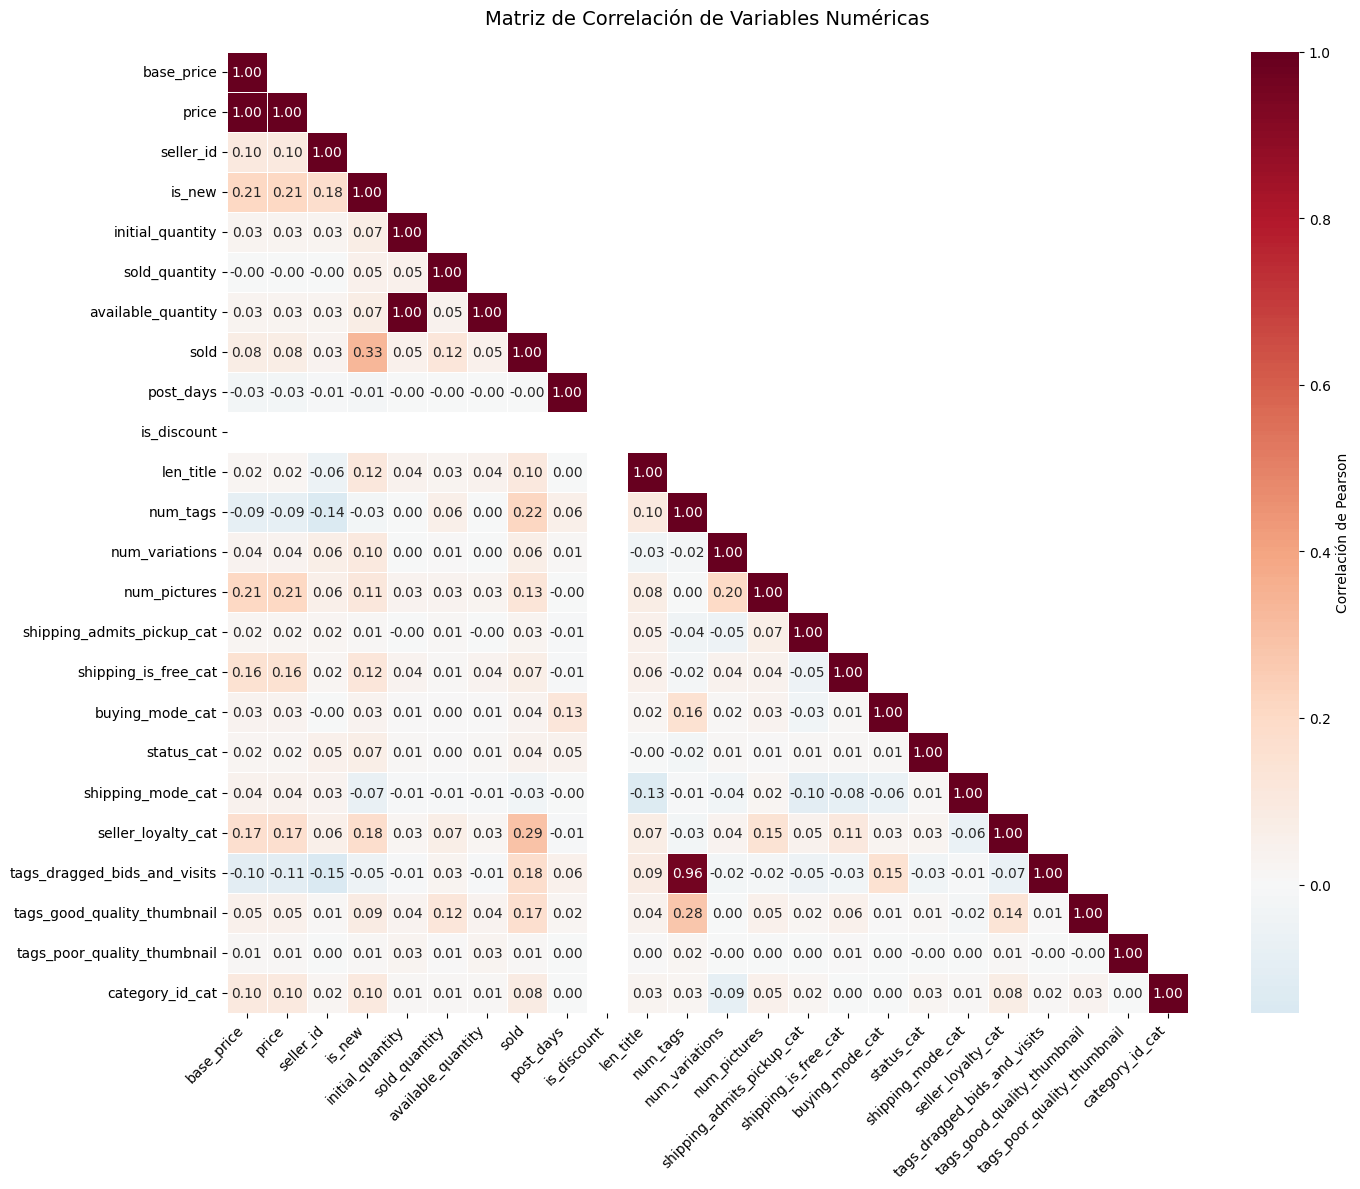

In [92]:
fe.plot_correlation_matrix(figsize=(15, 12))

Eliminar is_discount porque no presenta nada util, base_price porque es lo mismo que price, num_tags porque generaliza lo que ya se tiene con las onehotencoding de los valores, initial_quantity porque es lo mismo que available quantity.

In [93]:
fe.remove_columns(['is_discount','base_price','num_tags','initial_quantity'])

2025-07-03 07:43:59,579 - INFO - Se eliminaron 4 columnas exitosamente.
Columnas eliminadas:
- is_discount
- base_price
- num_tags
- initial_quantity
Columnas restantes en el DataFrame: 22


También post_days y tags_poor_quality_thumbnial, porque tiene muy baja correlación, y mejor eliminar variables para hacer más simple el modelo.

In [95]:
fe.remove_columns(['post_days','tags_poor_quality_thumbnail'])

2025-07-03 07:47:37,680 - INFO - Se eliminaron 2 columnas exitosamente.
Columnas eliminadas:
- post_days
- tags_poor_quality_thumbnail
Columnas restantes en el DataFrame: 20


In [102]:
# Guardar con metadatos (default)
fe.save_processed_dataset('dataset_procesado_featureengineering_v1')

2025-07-03 08:03:30,151 - INFO - Dataset guardado exitosamente:
- CSV: c:\Users\Milara\Desktop\github\meli-challenge\data\processed\dataset_procesado_featureengineering_v1_20250703_080329.csv
- Metadatos: c:\Users\Milara\Desktop\github\meli-challenge\data\processed\dataset_procesado_featureengineering_v1_20250703_080329_metadata.json

Información del dataset:
- Filas: 85,060
- Columnas: 20
- Tamaño del archivo: 5.4 MB
